<a href="https://colab.research.google.com/github/negrete-93/Metodo-de-colocacion/blob/main/Metodo_de_colocacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método de colocación

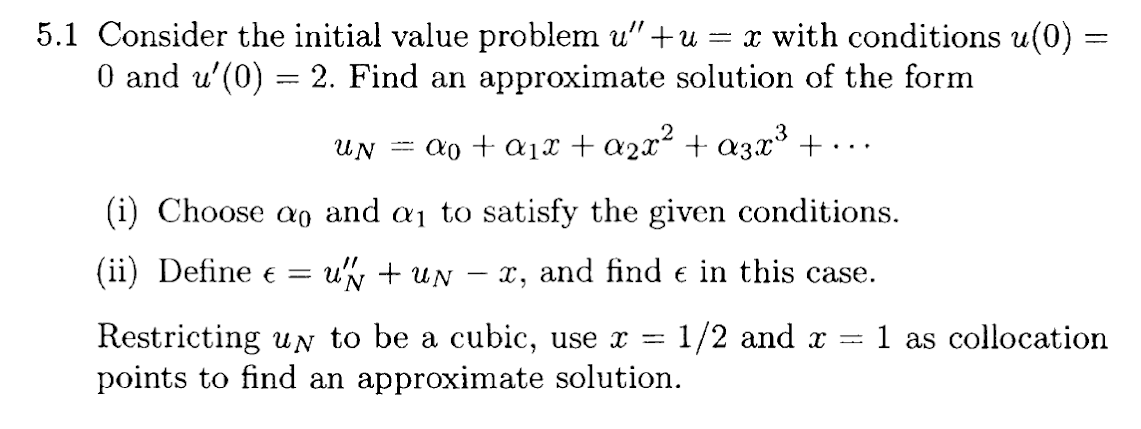

In [18]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Solución analítica:

In [19]:
x, a, b = sp.symbols('x a b')
x= sp.symbols ('x') #Introducción de la variable
u =sp.Function('u')#Definición de la función

In [20]:
ode = u(x).diff(x,x) +u(x)- x
sp.dsolve( ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

Definimos las condiciones:

In [21]:
sol =sp.dsolve(ode, ics={u(0): 0, u(x).diff(x).subs(x,0):2})
sol

Eq(u(x), x + sin(x))

In [22]:
u_expr = sol.rhs #Parte derecha de la sol
u_num = sp.lambdify(x,u_expr)

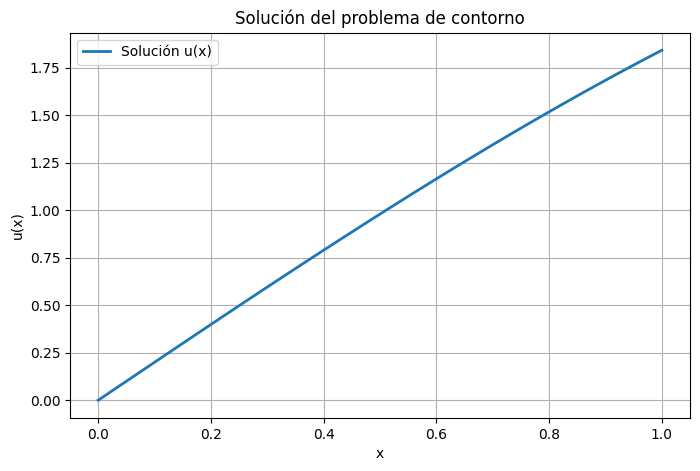

In [26]:
xx = np.linspace(0,1,100)
yy= u_num(xx)

plt.figure (figsize=(8,5))
plt.plot (xx,yy, label = "Solución u(x)", linewidth =2)
plt.title("Solución del problema de contorno")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Solución numérica:

In [28]:
alpha_0 = 0
alpha_1 = 2
u_n = alpha_0 + alpha_1 * x +a * x**2 + b * x**3 #Función de prueba
u_n

a*x**2 + b*x**3 + 2*x

In [29]:
u_n_2 = sp.diff(u_n, x, 2)
E= u_n_2 + u_n - x
E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [32]:
E.simplify()

a*x**2 + 2*a + b*x**3 + 6*b*x + x

In [33]:
points=[sp.Rational(1,2),sp.Rational(1)]
print('Puntos de colocación:' ,points)

Puntos de colocación: [1/2, 1]


In [34]:
eqs=[sp.Eq(E.subs(x,p),0) for p in points]
#Resolver para a y b
sol_1=sp.solve(eqs,[a,b])

a_val = sol_1[a]
b_val = sol_1[b]

print(f" a2={a_val}, a3={b_val}")

 a2=-1/17, a3=-2/17


In [35]:
for eq in eqs:
 sp.pprint(eq)

9⋅a   25⋅b   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅a + 7⋅b + 1 = 0


Solución analítica y numérica

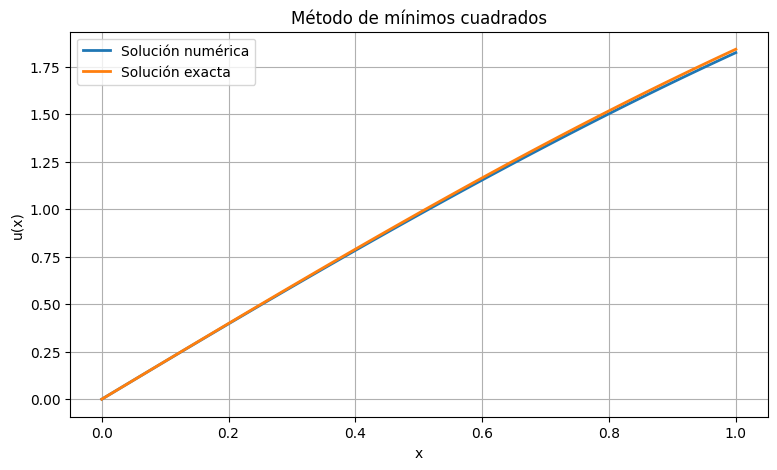

In [36]:
xx = np.linspace(0, 1, 100)

u_aprox_expr = u_n.subs({a: a_val, b: b_val}) # Solución aproximada
u_aprox_num = sp.lambdify(x, u_aprox_expr, 'numpy') # Convertir a función numérica

plt.figure(figsize=(9, 5))
plt.plot(xx, u_aprox_num(xx), label="Solución numérica", linewidth=2)
plt.plot(xx, yy, label="Solución exacta", linewidth=2)

plt.title("Método de mínimos cuadrados")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

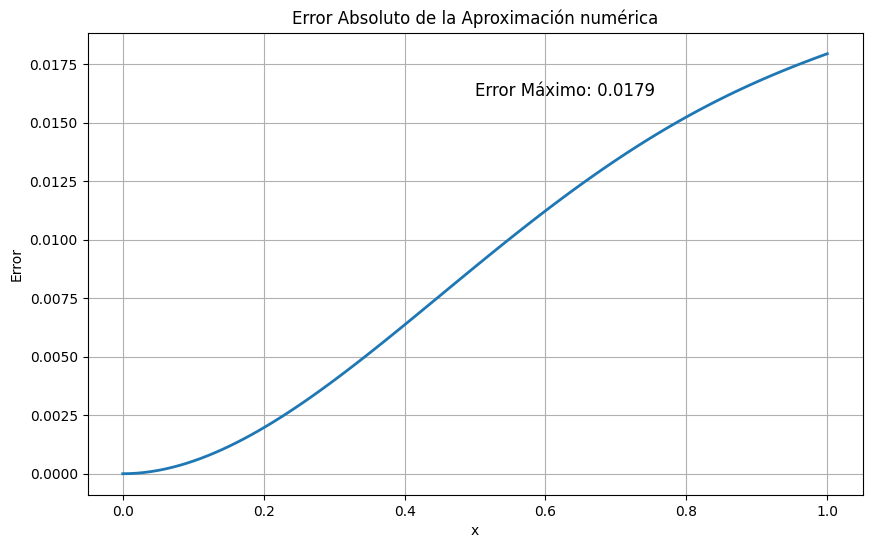

In [38]:
u_aprox_expr = u_n.subs({a: a_val, b: b_val})
u_exacta_expr = sol.rhs
error_expr = sp.Abs(u_exacta_expr - u_aprox_expr) #Error

error_num = sp.lambdify(x, error_expr, 'numpy') #Convertir el error a función numérica

xx = np.linspace(0, 1, 100)
yy_error = error_num(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy_error, linewidth=2)
plt.title('Error Absoluto de la Aproximación numérica')
plt.xlabel('x')
plt.ylabel('Error')
plt.grid(True)
#Error máximo
error_max = np.max(yy_error)
plt.annotate(f'Error Máximo: {error_max:.4f}',
             xy=(0.5, error_max * 0.9),
             xytext=(0.5, error_max * 0.9),
             fontsize=12)
plt.show()